<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_8_Mikhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

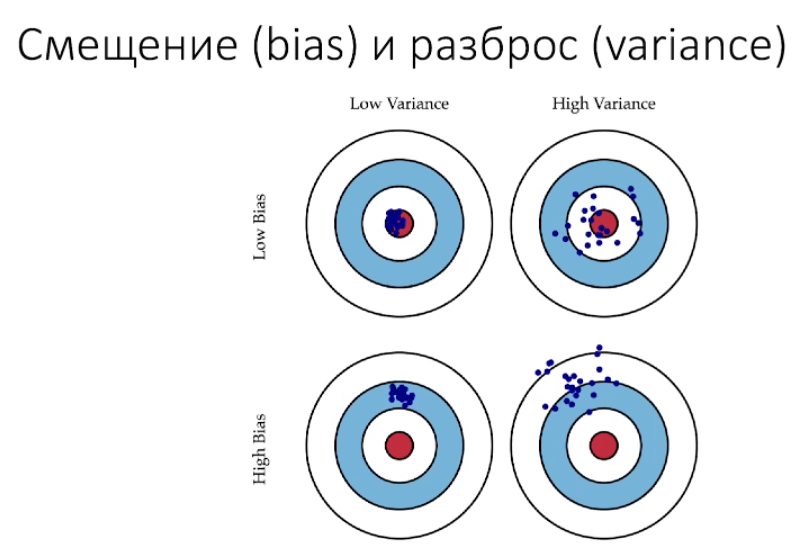

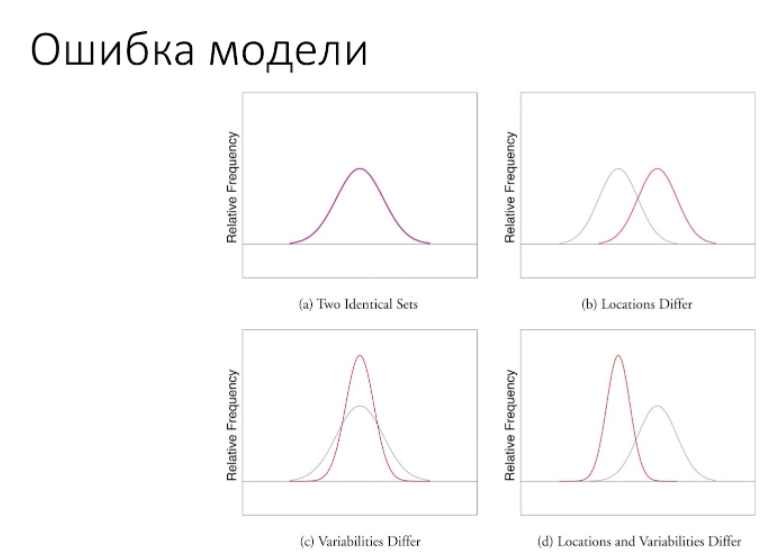

практикум
Ошибка данных и модели

In [18]:
import numpy as np
import pandas as pd

In [19]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_2.csv')
print(data)

                timestamp  meter_reading  air_temperature  cloud_coverage  \
0     2016-01-30 08:00:00        43.6839              8.3             0.0   
1     2016-01-31 05:00:00        37.5408             12.8             0.0   
2     2016-01-31 17:00:00        52.5571             20.6             0.0   
3     2016-04-08 14:00:00        59.3827             21.7             2.0   
4     2016-05-01 19:00:00       448.0000             31.1             0.0   
...                   ...            ...              ...             ...   
5406  2016-12-31 19:00:00       232.0710             22.8             0.0   
5407  2016-12-31 20:00:00       189.0690             23.3             0.0   
5408  2016-12-31 21:00:00       169.9580             23.3             0.0   
5409  2016-12-31 22:00:00       169.9580             22.8             0.0   
5410  2016-12-31 23:00:00       175.4180             20.6             0.0   

      dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_speed  \

In [20]:
# вычислим среднеквадратичное (стандартное) отклонение для данных

std = np.std(data['meter_reading'])
print ('{0:.4}'.format(std))

49.13


построение базовой модели

In [21]:
# среднее значение и его ошибка
model = float(data['meter_reading'].mean())
err = np.mean(np.abs(data['meter_reading'] - model))
print('модель: {0:.4},'.format(model),
  'ошибка модели общее среднее {0:.4}%,'.format(100*err/model),
  'ошибка данных {0:.4}%'.format(100*std/model))

модель: 237.7, ошибка модели общее среднее 15.17%, ошибка данных 20.66%


модель по часу
выберем значения == 0

In [22]:
data0 = data.loc[data['hour']==0]
print(data0.head())

               timestamp  meter_reading  air_temperature  cloud_coverage  \
11   2016-05-21 00:00:00        249.817             26.7             6.0   
35   2016-05-22 00:00:00        251.182             28.9             2.0   
59   2016-05-23 00:00:00        237.531             26.7             6.0   
83   2016-05-24 00:00:00        223.197             26.1             4.0   
107  2016-05-25 00:00:00        208.863             26.1             4.0   

     dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_speed  \
11              19.4                0.0              1017.5         0.0   
35              17.2                0.0              1013.6         4.1   
59              14.4                0.0              1011.5         7.2   
83              15.6                0.0              1014.1         6.2   
107             13.9                0.0              1019.6         5.1   

     air_temperature1  wind_direction_sin  wind_direction_cos  hour  
11               -0.5 

посмотри модель по часу и сравним ее точность с базовой

In [23]:
model0 = float(data0['meter_reading'].mean())
err0 = np.mean(np.abs(data0['meter_reading'] - model0))
print('модель: {0:.4},'.format(model0),
  'ошибка модели среднее по часу {0:.4}%,'.format(100*err0/model),
  'ошибка базовой модели общее среднее {0:.4}%'.format(100*err/model))

модель: 238.7, ошибка модели среднее по часу 13.68%, ошибка базовой модели общее среднее 15.17%


**задание**


1.Дайте определение (краткое, как вы это понимаете) смещения и разброса данных в модели.


смещение - это некое математическое ожидание разницы истинного значения и того, что выдал алгоритм в результате своего выполнения. Понятно, что смещение будет всегда, так как мы в любом случае используем приближенное моделирование любого процесса. Весь вопрос в том - устроит ли это смещение наблюдателя, или нет.
Смещение в машинном обучении - это параметр, который используется в некоторых алгоритмах для предсказания целевой переменной. Он помогает алгоритму, когда у него есть сложности с определением паттернов между входными данными и целевой переменной, из-за недостатка данных или наличия шума.

Разброс - это дисперсия ответов алгоритма. Связан с шумами, стохастической природой настройки. Разброс в ML, или машинном обучении, относится к степени вариации или отклонения значений от среднего значения. Это мера того, насколько данные “разбросаны” или отличаются друг от друга. Чем больше разброс, тем больше различия между наблюдениями, что может указывать на более сложную модель или менее однородные данные. Уменьшение разброса может означать более точное предсказание или более простую модель.

 2.Как можно исключить смещение?

Чтобы удалить смещение из модели машинного обучения,  нужно сначала определить, где это смещение находится в вашей модели. Затем мы можем удалить его, изменив параметры модели или удалив определенные части модели. Однако удаление смещения может ухудшить точность модели, поэтому важно протестировать модель после удаления смещения, чтобы убедиться, что она все еще работает должным образом.
Поэтому считается,что смещение устранить невозможно. Это связано с самим определением алгоритма, который не может учесть все без исключения факторы, влияющие на моделирование процесса. В самой сути алгоритма уже заложена ошибка, влияющая на смещение. Однако можно применить несколько моделей, которые будут иметь различные по значению ошибки. Тем самым можно максимально нивелировать смещение.

3.Решите задачу, предложенную спикером.

1. Рассчитать ошибку всех значений по часу

создаем отдельные фреймы по каждому часу (0-23)

In [24]:
data0 = data.loc[data['hour'] == 0]
data1 = data.loc[data['hour'] == 1]
data2 = data.loc[data['hour'] == 2]
data3 = data.loc[data['hour'] == 3]
data4 = data.loc[data['hour'] == 4]
data5 = data.loc[data['hour'] == 5]
data6 = data.loc[data['hour'] == 6]
data7 = data.loc[data['hour'] == 7]
data8 = data.loc[data['hour'] == 8]
data9 = data.loc[data['hour'] == 9]
data10 = data.loc[data['hour'] == 10]
data11 = data.loc[data['hour'] == 11]
data12 = data.loc[data['hour'] == 12]
data13 = data.loc[data['hour'] == 13]
data14 = data.loc[data['hour'] == 14]
data15 = data.loc[data['hour'] == 15]
data16 = data.loc[data['hour'] == 16]
data17 = data.loc[data['hour'] == 17]
data18 = data.loc[data['hour'] == 18]
data19 = data.loc[data['hour'] == 19]
data20 = data.loc[data['hour'] == 20]
data21 = data.loc[data['hour'] == 21]
data22 = data.loc[data['hour'] == 22]
data23 = data.loc[data['hour'] == 23]

делаем модели ансамбля

In [54]:
model0 = float(data0['meter_reading'].mean())
model1 = float(data1['meter_reading'].mean())
model2 = float(data2['meter_reading'].mean())
model3 = float(data3['meter_reading'].mean())
model4 = float(data4['meter_reading'].mean())
model5 = float(data5['meter_reading'].mean())
model6 = float(data6['meter_reading'].mean())
model7 = float(data7['meter_reading'].mean())
model8 = float(data8['meter_reading'].mean())
model9 = float(data9['meter_reading'].mean())
model10 = float(data10['meter_reading'].mean())
model11 = float(data11['meter_reading'].mean())
model12 = float(data12['meter_reading'].mean())
model13 = float(data13['meter_reading'].mean())
model14 = float(data14['meter_reading'].mean())
model15 = float(data15['meter_reading'].mean())
model16 = float(data16['meter_reading'].mean())
model17 = float(data17['meter_reading'].mean())
model18 = float(data18['meter_reading'].mean())
model19 = float(data19['meter_reading'].mean())
model20 = float(data20['meter_reading'].mean())
model21 = float(data21['meter_reading'].mean())
model22 = float(data22['meter_reading'].mean())
model23 = float(data23['meter_reading'].mean())


считаем ошибки каждой модели по каждому часу

In [55]:
err0 = np.mean(np.abs(data0['meter_reading'] - model0))
err1 = np.mean(np.abs(data1['meter_reading'] - model1))
err2 = np.mean(np.abs(data2['meter_reading'] - model2))
err3 = np.mean(np.abs(data3['meter_reading'] - model3))
err4 = np.mean(np.abs(data4['meter_reading'] - model4))
err5 = np.mean(np.abs(data5['meter_reading'] - model5))
err6 = np.mean(np.abs(data6['meter_reading'] - model6))
err7 = np.mean(np.abs(data7['meter_reading'] - model7))
err8 = np.mean(np.abs(data8['meter_reading'] - model8))
err9 = np.mean(np.abs(data9['meter_reading'] - model9))
err10 = np.mean(np.abs(data10['meter_reading'] - model10))
err11 = np.mean(np.abs(data11['meter_reading'] - model11))
err12 = np.mean(np.abs(data12['meter_reading'] - model12))
err13= np.mean(np.abs(data13['meter_reading'] - model13))
err14 = np.mean(np.abs(data14['meter_reading'] - model14))
err15 = np.mean(np.abs(data15['meter_reading'] - model15))
err16 = np.mean(np.abs(data15['meter_reading'] - model16))
err17 = np.mean(np.abs(data16['meter_reading'] - model17))
err18 = np.mean(np.abs(data18['meter_reading'] - model18))
err19 = np.mean(np.abs(data19['meter_reading'] - model19))
err20 = np.mean(np.abs(data20['meter_reading'] - model20))
err21 = np.mean(np.abs(data21['meter_reading'] - model21))
err22 = np.mean(np.abs(data22['meter_reading'] - model22))
err23 = np.mean(np.abs(data23['meter_reading'] - model23))


выводим на печать в сравнении

In [65]:
print('модель: {0:.4},'.format(model),
      'ошибка модели среднее по часу  0-1 {0:.4}%,'.format(100*err0/model),
      'ошибка модели среднее по часу  0-1 {0:.4}%,'.format(100*err0/model),
      'ошибка модели среднее по часу  1-2 {0:.4}%,'.format(100*err1/model),
      'ошибка модели среднее по часу  2-3 {0:.4}%,'.format(100*err2/model),
      'ошибка модели среднее по часу  3-4 {0:.4}%,'.format(100*err3/model),
      'ошибка модели среднее по часу  4-5 {0:.4}%,'.format(100*err4/model),
      'ошибка модели среднее по часу  5-6 {0:.4}%,'.format(100*err5/model),
      'ошибка модели среднее по часу  6-7 {0:.4}%,'.format(100*err6/model),
      'ошибка модели среднее по часу  7-8 {0:.4}%,'.format(100*err7/model),
      'ошибка модели среднее по часу  8-9 {0:.4}%,'.format(100*err8/model),
      'ошибка модели среднее по часу  9-10 {0:.4}%,'.format(100*err9/model),
      'ошибка модели среднее по часу  10-11 {0:.4}%,'.format(100*err10/model),
      'ошибка модели среднее по часу  11-12 {0:.4}%,'.format(100*err11/model),
      'ошибка модели среднее по часу  12-13 {0:.4}%,'.format(100*err12/model),
      'ошибка модели среднее по часу  13-14 {0:.4}%,'.format(100*err13/model),
      'ошибка модели среднее по часу  14-15 {0:.4}%,'.format(100*err14/model),
      'ошибка модели среднее по часу  15-16 {0:.4}%,'.format(100*err15/model),
      'ошибка модели среднее по часу  16-17 {0:.4}%,'.format(100*err16/model),
      'ошибка модели среднее по часу  17-18 {0:.4}%,'.format(100*err17/model),
      'ошибка модели среднее по часу  18-19 {0:.4}%,'.format(100*err18/model),
      'ошибка модели среднее по часу  19-20 {0:.4}%,'.format(100*err19/model),
      'ошибка модели среднее по часу  20-21 {0:.4}%,'.format(100*err20/model),
      'ошибка модели среднее по часу  21-22 {0:.4}%,'.format(100*err21/model),
      'ошибка модели среднее по часу  22-23 {0:.4}%,'.format(100*err22/model),
      'ошибка модели среднее по часу  23-0 {0:.4}%,'.format(100*err23/model),
      'ошибка базовой модели общее среднее {0:.4}%'.format(100*err/model), sep = '\n')

модель: 237.7,
ошибка модели среднее по часу  0-1 13.68%,
ошибка модели среднее по часу  0-1 13.68%,
ошибка модели среднее по часу  1-2 14.04%,
ошибка модели среднее по часу  2-3 14.27%,
ошибка модели среднее по часу  3-4 13.84%,
ошибка модели среднее по часу  4-5 13.64%,
ошибка модели среднее по часу  5-6 13.93%,
ошибка модели среднее по часу  6-7 13.09%,
ошибка модели среднее по часу  7-8 13.62%,
ошибка модели среднее по часу  8-9 15.83%,
ошибка модели среднее по часу  9-10 15.09%,
ошибка модели среднее по часу  10-11 16.0%,
ошибка модели среднее по часу  11-12 17.28%,
ошибка модели среднее по часу  12-13 17.55%,
ошибка модели среднее по часу  13-14 17.5%,
ошибка модели среднее по часу  14-15 17.92%,
ошибка модели среднее по часу  15-16 17.46%,
ошибка модели среднее по часу  16-17 17.46%,
ошибка модели среднее по часу  17-18 17.35%,
ошибка модели среднее по часу  18-19 14.87%,
ошибка модели среднее по часу  19-20 14.14%,
ошибка модели среднее по часу  20-21 13.64%,
ошибка модели сред

2. Средняя ошибка ансамблей всех моделей по часу

In [68]:
# форомируем словарь
err_hour =  {'err':[err0, err1, err2, err3,err4,err5,err6,err7,err8,err9,err10,err11,err12,err13,err14,err15,err16,err17,err18,err19,err20,err21,err22,err23]
             }

#Преобразуем в Pandas DataFrame
err_hour = pd.DataFrame(err_hour)

#запишем ошибки
err_hour['err'] = err_hour['err'].apply(lambda x: 100*x/model)

print(err_hour)


          err
0   13.680794
1   14.037395
2   14.274954
3   13.841418
4   13.635025
5   13.934140
6   13.086016
7   13.619165
8   15.827880
9   15.088988
10  15.999463
11  17.278955
12  17.545907
13  17.495151
14  17.918066
15  17.458220
16  17.457920
17  17.352780
18  14.870220
19  14.140589
20  13.640575
21  14.176784
22  14.613329
23  14.342584


In [71]:
# вычислим среднюю ошибку ансамблей моделей по часу
average_err_hour = err_hour['err'].mean()

print('средняя ошибка модели по часу {0:.4}% '.format(average_err_hour))

средняя ошибка модели по часу 15.22% 
